# Разведочный анализ данных: анализ зависимостей и многомерные методы


**Разведочный анализ данных** (англ. **exploratory data analysis**, **EDA**) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Понятие введено математиком Джоном Тьюки, который сформулировал цели такого анализа следующим образом:

- максимальное «проникновение» в данные,  
- выявление основных структур,  
- выбор наиболее важных переменных,  
- обнаружение отклонений и аномалий,  
- проверка основных гипотез,  
- разработка начальных моделей.


Основные средства разведочного анализа — изучение вероятностных распределений переменных, построение и анализ корреляционных матриц, факторный анализ, дискриминантный анализ, многомерное шкалирование.

В этом блокноте вы познакомитесь сметодами разведочного анализа для выявления зависимостей между несколькими переменными.


## Ресурсы

* Визуализация в Pandas https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* Документация Seaborn http://seaborn.pydata.org/tutorial.html
* Галерея графиков Matplotlib https://matplotlib.org/gallery/index.html
* Python Plotting for Exploratory Analysis https://pythonplot.com/
* A Dramatic Tour through Python’s Data Visualization Landscape (including ggplot and Altair) [ссылка](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)
* Глава 4 книги Дж. Вандер Плас Python для сложных задач. Наука о данных и машинное обучение
* Эта же глава в виде [блокнота](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* Глава 9 книги Уэса Маккини Python и анализ данных, 2-е издание


Классные ресурсы по выбору способов визуализаций + примеры:
* https://www.data-to-viz.com/  
* https://datavizproject.com/  
* https://datavizcatalogue.com/RU/
* https://datayoga.ru/vizcards#catalogue

## Подготовка

В этом блокноте используются функции, которые были добавлены в пакет для визуализации Seaborn версии `0.11`.  В Seaborn 0.11 появились функции для простого сравнения гистограмм и плотностей распределений подгрупп - `hisplot()` И `displot()`. Также в этой версии лучше работают функции для построения диаграмм с использованием большого количества факторов - `relplot()`, `lmplot()`, `factorplot()`.

С дистрибутивом Anaconda от июля 2020 года, который сейчас скачивается с сайта, идет более старая версия - `0.10.1`. 
Рекомендуем проверить, какая у вас установлена версия Seaborn:

In [75]:
!conda list seaborn

# packages in environment at C:\Anaconda3:
#
# Name                    Version                   Build  Channel
seaborn                   0.11.0                     py_0  


Если версия < 0.11, то обновите ее, раскомментировав первую строчку в следующей ячейке и запустив ее:

In [71]:
#!conda install -y seaborn=0.11
#или, если не сработало или если у вас не Anaconda:
#!pip install seaborn==0.11

Если что-то пойдет не так - пишите в канал Вопросы и консультации.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Пакет для построения статистических графиков и разведочного анализа
%matplotlib inline

mpg = pd.read_csv('../datasets/mpg.csv')
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Мы загрузили данные о расходе топлива автомобилями разных марок и годов производства. Столбцы таблицы обозначают:

 - `manufacturer` - марка машины
 - `model` - модель
 - `displ` - объем двигателя в л
 - `year` - год выпуска
 - `cyl` - количество цилиндров
 - `trans` - тип трансмиссии (ручная или автоматическая коробка передач)
 - `drv` - тип привода (`f` - передний, `r` - задний, `4` - полный)
 - `cty` - пробег на 1 галлоне топлива (~4 л) в городе
 - `cty` - пробег на 1 галлоне топлива на трассе
 - `fl` - тип топлива
 - `class` - класс машины
 

Загрузим также набор данных `diamonds`, который содержит сведения о ~50 тысячах бриллиантов:

In [3]:
diamonds = pd.read_csv('../datasets/diamonds.csv')
diamonds['price_per_carat'] = (diamonds['price'] / diamonds['carat']).round(0) # посчитали цену за карат
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1422.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1152.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1081.0


**Столбцы**

- `price` - цена в USD
- `carat` - вес бриллианта в каратах (0.2 г) 
- `cut` - качество огранки, в порядке улучшения: Fair, Good, Very Good, Premium, Ideal
- `color` - оттенок цвета, в порядке ухудшения: D (лучший) - J (худший)
- `clarity` - прозрачность бриллианта, в порядке улучшения: I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))
- `x` - длина в мм
- `y` - ширина в мм
- `z` - глубина в мм
- `depth` - соотношение глубины и видимого размера: `total depth percentage = z / mean(x, y) = 2 * z / (x + y)`
- `table` - ширина верхней плоской грани относительно самого широкого сечения

## Виды данных

В процессе анализа данных используется следующая терминология:

 - **Переменная** (**variable**) - качественная или количественная характеристика объекта, которую можно измерить.

- **Значение** (**value**) - зафиксированное в данных значение переменной.

- **Наблюдение** (**observation**) - набор измерений, выполненный в одинаковых условиях (обычно все измерения в рамках наблюдения выполняются в один и тот же момент времени и для одного и того же объекта.


Данные наблюдений удобно организовать в виде таблицы, в которой каждой строке соответствует наблюдение, а каждый столбец - переменной. В ячейках таблицы содержатся значения переменных. Данные такой структуры называются **хорошо структурированными** (**tidy data** - дословно - "опрятные данные"). Наша таблица про автомобили - пример хорошо структурированных данных.


In [4]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


Каждая строка - это отдельный автомобиль (наблюдение). Каждый столбец - это характеристика автомобиля (переменная). В ячейках каждой строки содержатся значения переменных - характеристики данного автомобиля. Такая структура данных наиболее удобна для анализа и визуализации.

In [5]:
mpg.pivot_table(['cty', 'hwy'], index=['manufacturer', 'class'], columns='year').round(1).head(10)

cty         hwy      
year                     1999  2008  1999  2008
manufacturer class                             
audi         compact     17.4  18.6  26.4  27.6
             midsize     15.0  16.5  24.0  24.0
chevrolet    2seater     15.5  15.3  24.5  25.0
             midsize     18.5  19.0  26.5  28.3
             suv         12.7  12.7  16.3  17.5
dodge        minivan     16.2  15.4  22.5  22.2
             pickup      11.7  12.2  16.0  16.2
             suv         11.7  12.0  16.0  16.0
ford         pickup      13.0  13.0  16.2  17.0
             subcompact  16.5  15.4  23.5  23.0

А такая таблица данных - не является хорошо структурированной. Здесь некоторые значения (годы) содержатся в столбцах таблицы. Поэтому некоторые операции (например, отбор значений по году) может быть сложнее выполнить.

Все переменные делятся на два вида: **количественные** и **категориальные**.

**Количественные** переменные отражают количество чего-либо. Главная их особенность - это возможность выполнения арифметических операций с такими переменными. Например, мы можем вычислить, на сколько градусов сегодня теплее (холоднее), чем вчера. Или во сколько раз один заказ больше другого по количеству заказанных единиц. Количественные данные представлены числовыми значениями.
С другой стороны, не всегда числа - это количественные данные. Например, нет никакого смысла в сложении кодов товаров или номеров футболистов в команде.

Количественные данные можно агрегировать  - суммировать, усреднять, вычислять другие описательные статистики.

Примеры количественных переменных: цена, величина скидки, физические характеристики - вес, объем, количество продукта (тонны, штуки и т.п.).

In [6]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


В таблице `mpg` количественные переменные - объем двигателя, год, количество цилиндров и пробег на галлоне в городе/на трассе.

Если у количественной переменной очень мало уникальных значений:

In [7]:
print(mpg['year'].unique(), mpg['cyl'].unique(), sep='\n')

[1999 2008]
[4 6 8 5]


-- такую переменную может быть удобнее рассматривать как категориальную. То есть, рассматривать ее как признак группы машин (по году выпуска или количеству цилиндров двигателя).

**Категориальные** переменные отражают принадлежность объекта к некоторой группе (категории). Например, в таблице `mpg` мы можем выделить группы машин по производителю, модели, типу трансмиссии, виду топлива и классу кузова. Как правило, категориальные переменные имеют текстовые значения. Иногда вместо них используются числовые коды категорий. Однако с кодами категорий арифметические операции и агрегирование бессмысленны.

Иногда количественные переменные называют **непрерывными** (**continuous**), поскольку их значения могут принимать какие угодно значения в некотором диапазоне, а категориальные - **дискретными** (**discrete**), поскольку они могут принимать значения только из ограниченного набора. Но это название может вводить в заблуждение. Например, в наборе данных о количестве детей в семье это количество может принимать только целые значения из ограниченного диапазона. Но это количественная переменная. А в наборе данных о заявках на банковский кредит переменная "место рождения" принимает хотя и дискретные значения, но их количество может быть очень большим.



В некоторых случаях полезно бывает изменить вид переменной - например, можно преобразовать количественную переменную в дискретную, чтобы упростить интерпретацию результатов. Например, мы можем преобразовать количественную переменную - пробег на 1 галлоне в категориальную. Разобъем данные на 3 равные по количеству наблюдений категории с помощью функции `qcut()`:

In [8]:
cty_cat = pd.qcut(mpg['cty'], q = 3)
cty_cat.unique()

[(15.0, 18.0], (18.0, 35.0], (8.999, 15.0]]
Categories (3, interval[float64]): [(8.999, 15.0] < (15.0, 18.0] < (18.0, 35.0]]

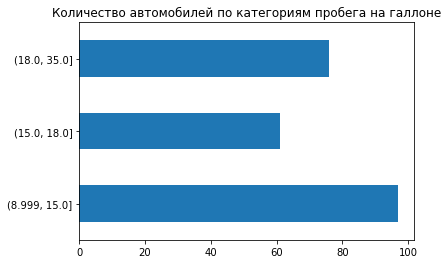

In [9]:
cty_cat.value_counts(sort=False).plot(kind='barh');
plt.title('Количество автомобилей по категориям пробега на галлоне');

В зависимости от ситуации, это представление может быть более полезным, чем исходная количественная переменная. Все автомобили распределены по 3-м категориям на основе топливной эффективности: низкая, средняя и высокая эффективность. Эти результаты легко объяснять и сравнивать.

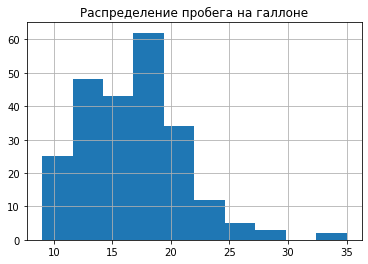

In [10]:
mpg['cty'].hist()
plt.title('Распределение пробега на галлоне');

А гистограмму поймет меньше людей.

Вид данных для переменной определяет, какие методы можно использовать для анализа. В блокноте [01_unvariate_eda.ipynb](01_unvariate_eda.ipynb) мы уже обсуждали отличия подходов к анализу распределений количественных и категориальных переменных. 

В этом блокноте мы рассмотрим методы анализа зависимостей между переменными разных видов.

## Анализ зависимостей для двух переменных

### Количественная переменная + категориальная переменная

Задача анализа связи между количественной и качественной переменной возникает когда необходимо сравнить характеристики нескольких групп.

#### Гистограмма и плотность распределения
Самую полную информацию об отличиях дает визуализация распределения:

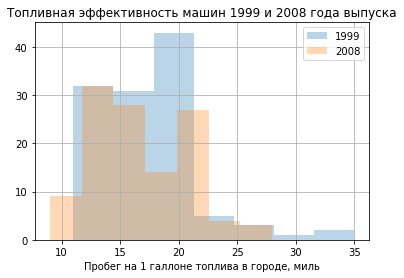

In [11]:
# Через pandas
fig, ax = plt.subplots()
for group, data in mpg.groupby('year'):
    data['cty'].hist(alpha=0.3, label=group, bins=7)
    
plt.xlabel('Пробег на 1 галлоне топлива в городе, миль')
plt.title('Топливная эффективность машин 1999 и 2008 года выпуска')
plt.legend();

Гистограммы неудобны для сравнения нескольких распределений на одном графике, поскольку их столбцы накладываются и заслоняют друг друга. Отчасти проблема решается с помощью полупрозрачности (`alpha`). 
Более радикальное решение - сравнение плотностей распределений.

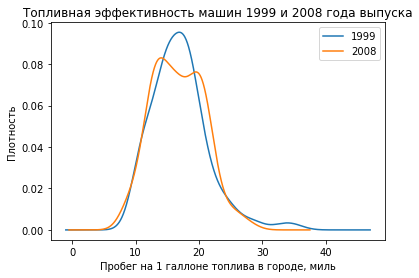

In [12]:
# Через pandas
fig, ax = plt.subplots()
for group, data in mpg.groupby('year'):
    data['cty'].plot.kde(label=group)
    
plt.xlabel('Пробег на 1 галлоне топлива в городе, миль')
plt.ylabel('Плотность')
plt.title('Топливная эффективность машин 1999 и 2008 года выпуска')
plt.legend();

**Оценки плотности** распределений (**kernel density estimate**) визуализируются с помощью линий, поэтому их проще сравнивать между собой. Форма распределения на графике оценки плотности и гистограмме отличается, т.к. график плотности использует сглаживание данных. Также отличается масштаб по оси ординат.

Как связаны плотность и гистограмма? Гистограмма показывает количество, либо долю наблюдений, приходящихся на интервал. Поэтому высота столбца зависит от того, какой ширины интервал. Чем шире - тем больше оказывается в нем наблюдений. Плотность же не зависит от ширины интервала, т.к. получается путем деления доли попавших в интервал наблюдений на ширину этого интервала.

Например, на гистограмме мы видим, что на интервал от 17 до 21 миль на галлоне попали 42 машины выпуска 1999 года (частота = 42). Всего машин этого года выпуска - 117:

In [13]:
len(mpg.query('year==1999'))

117

Таким образом, относительная частота попадания в интервал составляет:

In [14]:
42/117

0.358974358974359

Плотность получается делением относительной частоты на ширину интервала: 21 - 17 = 4, т.е.:

In [15]:
42/117/4

0.08974358974358974

Примерно такое значение мы и видим на графике оценки плотности.

Степень сглаживания плотности можно задать с помощью параметра `bw_method`:

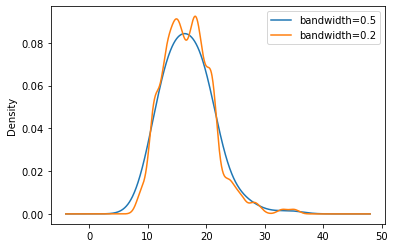

In [16]:
# Через pandas

mpg['cty'].plot.kde(bw_method=0.5, label='bandwidth=0.5')
mpg['cty'].plot.kde(bw_method=0.2, label='bandwidth=0.2')
plt.legend(loc='best');

**Интерпретация**

На гистограмме и графике плотности распределения пробега на галлоне мы видим, что формы распределений оказались близкими. Среди машин 1999 года производства есть машины с нетипично большим пробегом на галлоне, а среди машин 2008 года есть два пика - около 10 и около 20 миль на галлоне - распределение **бимодальное**. Это может говорить о наличии двух неоднородных подгрупп среди таких машин.

Теперь сравним распределения веса бриллиантов `carat` в зависимости от качества их огранки `cut` с использованием таблицы `diamonds`:

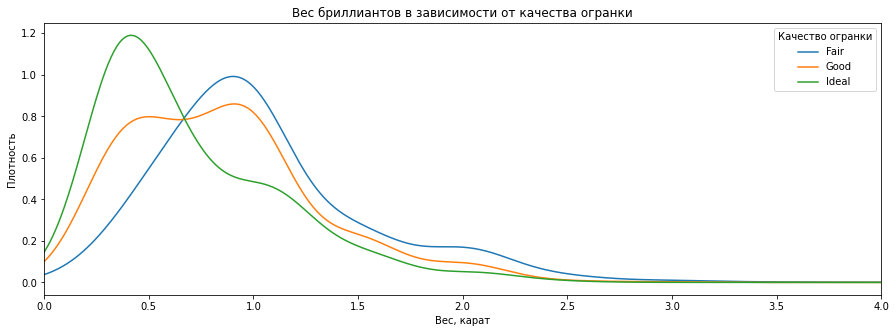

In [144]:
# Через pandas
fig, ax = plt.subplots(figsize=(15,5))

for group, data in diamonds.groupby('cut'):
    if group in ['Fair', 'Good', 'Ideal']:
        data['carat'].plot.kde(bw_method=0.4, label=group) # степень сглаживания подбирается
    
plt.xlabel('Вес, карат')
plt.ylabel('Плотность')
plt.title('Вес бриллиантов в зависимости от качества огранки')
plt.xlim((0, 4))
plt.legend(title='Качество огранки');

Здесь различия между группами уже более заметны: бриллианты с низким качеством огранки (Fair, Good) крупнее. Бриллианты с идеальной огранкой самые мелкие: "тело" распределения их веса смещено влево.

В Seaborn есть функции, которые позволяют легко сравнивать распределения для подгрупп. Они были добавлены в версии `0.11` пакета, поэтому для использования вам нужно обновить пакет, как сказано в начале этого блокнота.

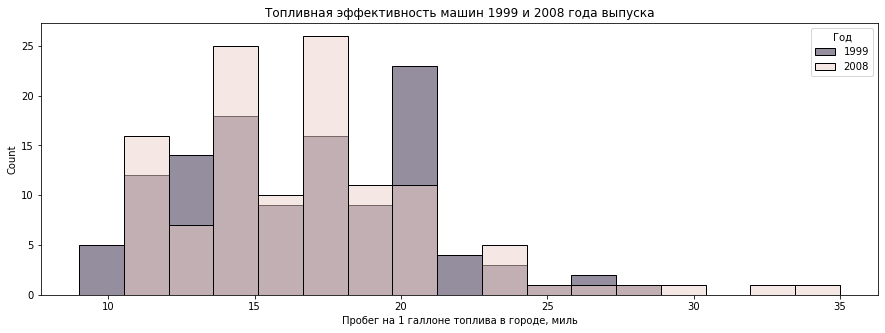

In [153]:
# Через Seaborn
plt.figure(figsize=(15, 5))
sns.histplot(x='cty', hue='year', data=mpg, legend=False) # Легенду добавим потом, чтобы можно было задать название

plt.xlabel('Пробег на 1 галлоне топлива в городе, миль')
plt.legend(title='Год', labels=mpg['year'].unique()) # Добавляем легенду, чтобы написать "год" на русском
plt.title('Топливная эффективность машин 1999 и 2008 года выпуска');


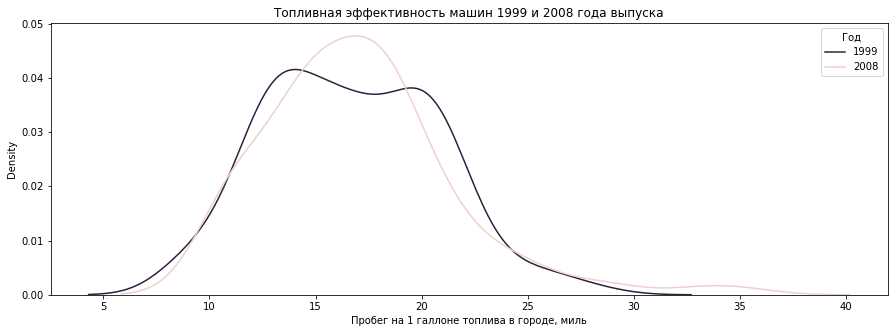

In [154]:
# Через seaborn
plt.figure(figsize=(15, 5))
sns.kdeplot(x='cty', hue='year', data=mpg, legend=False) # Легенду добавим потом, чтобы можно было задать название

plt.xlabel('Пробег на 1 галлоне топлива в городе, миль')
plt.legend(title='Год', labels=mpg['year'].unique()) # Добавляем легенду, чтобы написать "год" на русском
plt.title('Топливная эффективность машин 1999 и 2008 года выпуска');


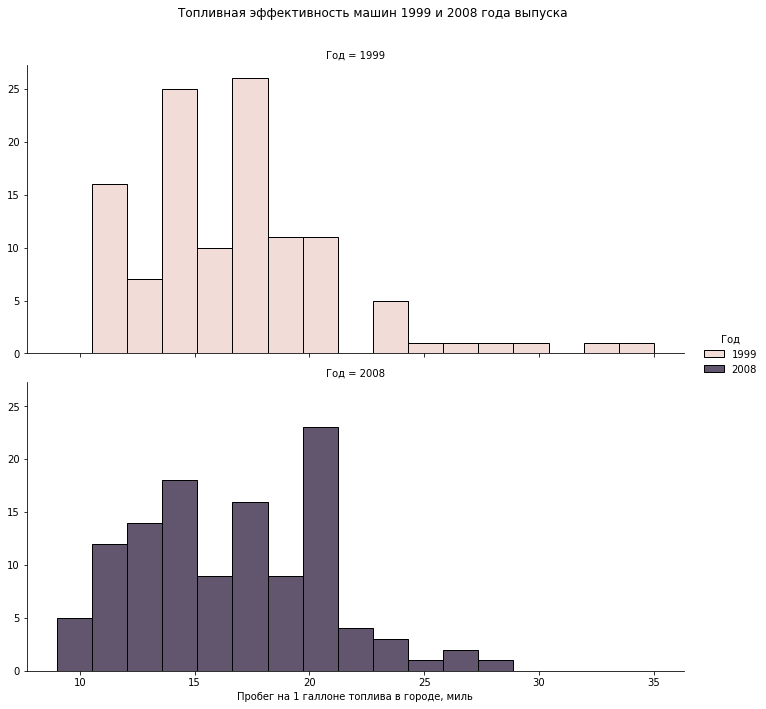

In [196]:
# Через seaborn
p = sns.displot(x='cty', hue='Год', row='Год',
                data=mpg.rename({'year' : 'Год'}, axis='columns'), # Переименовали столбец, чтобы он был на русском в легенде
                aspect=2 #Соотношение ширины и высоты каждой панели
                ).set(ylabel=None)

plt.xlabel('Пробег на 1 галлоне топлива в городе, миль')
plt.subplots_adjust(top=0.9) # Сжимаем подграфики, чтобы оставить место сверху для заголовка
plt.suptitle('Топливная эффективность машин 1999 и 2008 года выпуска');


#### Ящичные диаграммы

**Ящичная диаграмма** (ящик с усами, box plot, box and whisker plot) позволяет компактно передать основные характеристики распределения данных - медиану, область наиболее типичных значений, наличие выбросов в данных.

![](pics/boxplot.png)

"Ящики" удобно использовать для сравнения распределений в группах.

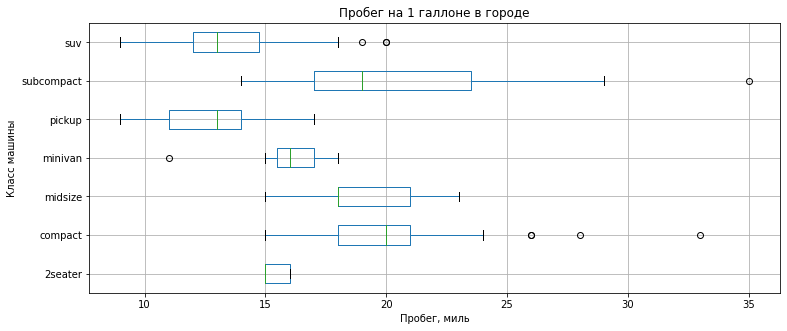

In [159]:
# Через pandas - quick & dirty
fig, ax = plt.subplots(figsize=(12, 5))
mpg.boxplot(column='cty', by='class', vert=False, ax=ax)
plt.suptitle('');
plt.title('Пробег на 1 галлоне в городе');
plt.xlabel('Пробег, миль')
plt.ylabel('Класс машины');

Matplotlib дает больше возможностей в настройке вида графика, но результат получить сложнее. Чтобы нарисовать на одном графике несколько ящиков, в этом примере при помощи спискового включения формируется список с массивами значений для каждого класса машин отдельно.

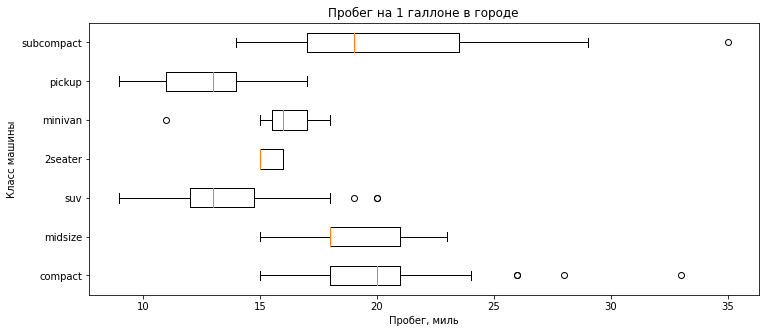

In [160]:
# Через Matplotlib: 

fig, ax = plt.subplots(figsize=(12, 5))

ax.boxplot([mpg[mpg['class'] == c]['cty'].values
                for c in mpg['class'].unique()],
          vert = False)
 
ax.set(yticklabels=mpg['class'].unique(),
       ylabel='Класс машины',
       xlabel='Пробег, миль',
       title='Пробег на 1 галлоне в городе');


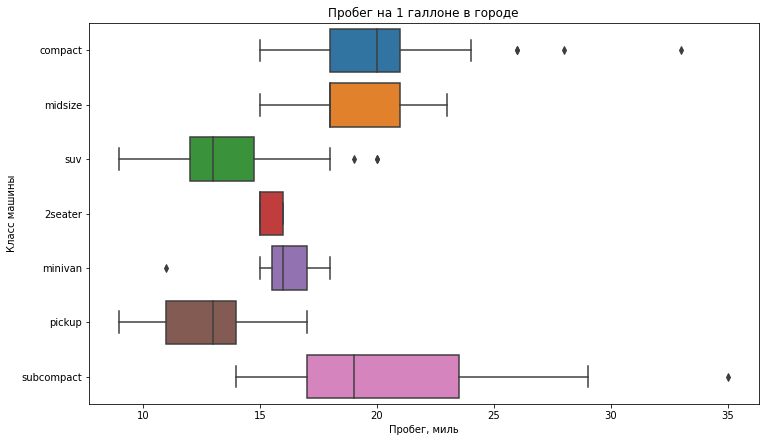

In [21]:
# Через Seaborn:
plt.figure(figsize=(12, 7))
sns.boxplot(
    y = 'class', 
    x='cty', 
    data=mpg
).set(
    xlabel = 'Пробег, миль',
    ylabel = 'Класс машины',
    title = 'Пробег на 1 галлоне в городе'
);

Для удобства интерпретации можно упорядочить категории по топливной эффективности. Для этого надо указать аргумент `order`, в котором задать порядок категорий в виде списка строк или индекса.

In [22]:
class_order = mpg.groupby('class')['cty'].median().sort_values() # Сортируем классы по медианному пробегу
class_order.index

Index(['pickup', 'suv', '2seater', 'minivan', 'midsize', 'subcompact',
       'compact'],
      dtype='object', name='class')

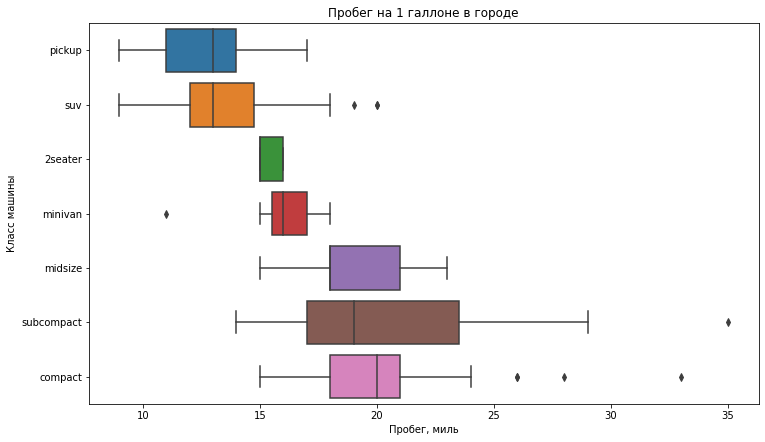

In [23]:
# Через Seaborn, с сортировкой:
plt.figure(figsize=(12, 7))
sns.boxplot(
    y = 'class', 
    x='cty', 
    data=mpg,
    order = class_order.index
).set(
    xlabel = 'Пробег, миль',
    ylabel = 'Класс машины',
    title = 'Пробег на 1 галлоне в городе'
);

**Интерпретация**

Машины класса `pickup`  и `suv` - наименее эффективная категория. Наиболее эффективные классы машин - `midsize`, `subcompact`, `compact`. 

Половина машин класса `subcompact` могут пройти от 16 до 24 миль на галлоне.

Среди машин классов `suv, subcompact, compact` есть выбросы - машины с нетипично большим пробегом на галлоне. Среди машин класса `minivan` есть выброс - машина с нетипично маленьким пробегом на галлоне. Чтобы узнать, что это за машины, мы можем отфильтровать набор данных:

In [24]:
mpg[(mpg['class'] == "minivan") & (mpg['cty'] < 15)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan


In [25]:
mpg[(mpg['class'] == "compact") & (mpg['cty'] > 24)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact


#### Аналоги ящиков - stripplot, violinplot

В Seaborn есть несколько визуализаций, которые можно использовать вместо ящичных диаграмм.

На диаграмме `stripplot` видны отдельные наблюдения. Это лучше работает, когда данных много:

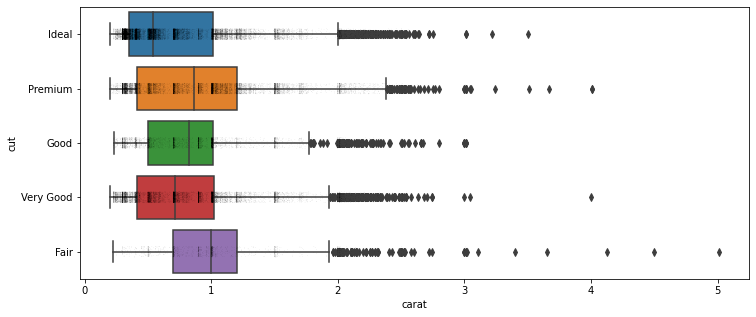

In [26]:
# stripplot через seaborn
plt.figure(figsize=(12, 5))
sns.boxplot(y = 'cut', x='carat', data=diamonds) # рисуем ящики как подложку
sns.stripplot(y = 'cut', x='carat', data=diamonds,               
              size=0.4, alpha=0.3, color='black'); # добавляем сами наблюдения

Точки случайным образом распределены по вертикали, чтобы мы могли видеть накладывающиеся друг на друга значения (*jitter*). В отличие от обычных ящиков, на диаграмме `stripplot` видна "полосатость" распределения - по-видимому, это следствие того, что огранщики предпочитают делать бриллианты с весами, кратными 0.1 карата.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


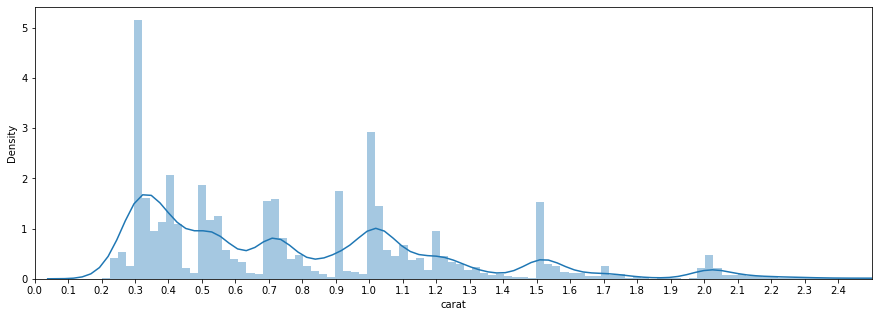

In [173]:
# seaborn 0.10.1
# Гистограмма для всех бриллиантов, но с большой детализацией
plt.figure(figsize=(15, 5))
sns.distplot(diamonds['carat'], bins=200)
plt.xticks(np.arange(0, 2.5, 0.1)) # деления по оси x
plt.xlim((0, 2.5)); # диапазон по оси x

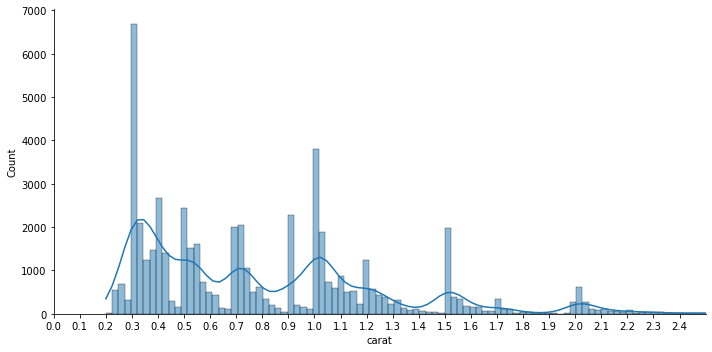

In [174]:
# seaborn 0.11
# Гистограмма для всех бриллиантов, но с большой детализацией
sns.displot(x='carat', data=diamonds,
            bins=200, aspect=2,
           kde=True)
plt.xticks(np.arange(0, 2.5, 0.1)) # деления по оси x
plt.xlim((0, 2.5)); # диапазон по оси x

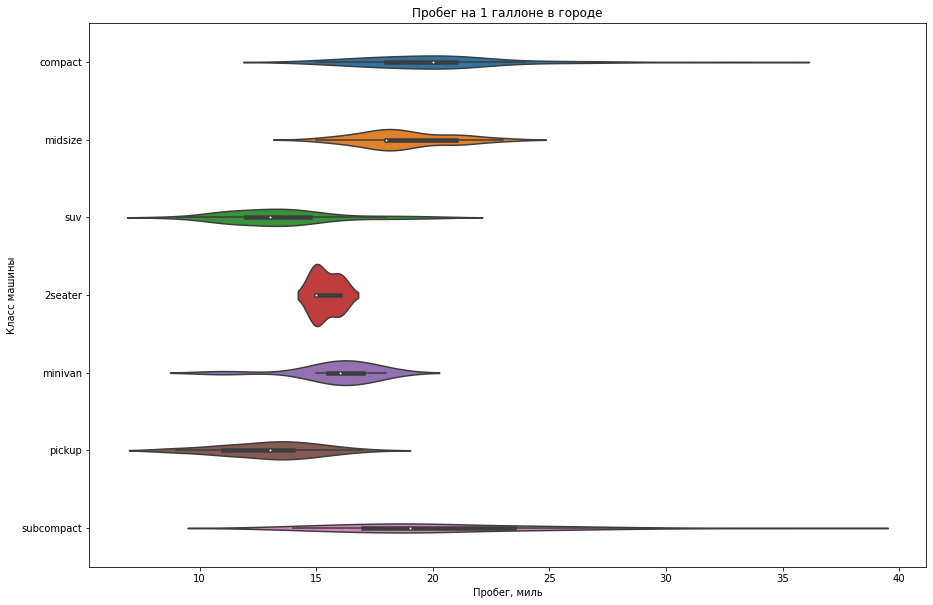

In [28]:
# violinplot через seaborn
plt.figure(figsize=(15, 10))
sns.violinplot(x = 'cty', y = 'class', data=mpg).set(
    xlabel = 'Пробег, миль',
    ylabel = 'Класс машины',
    title = 'Пробег на 1 галлоне в городе');

#### Столбиковые диаграммы с характеристиками групп

Еще более сжатым представлением данных являются столбиковые диаграммы с характеристиками групп.

В самом простом случае диаграмма может отражать частоты (размеры) или относительные частоты групп:

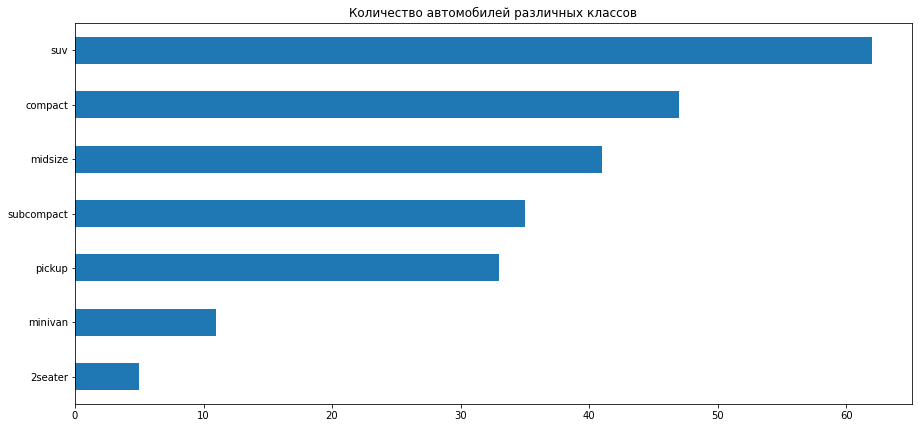

In [175]:
# Через pandas
plt.figure(figsize=(15, 7))
mpg['class'].value_counts(ascending=True).plot(kind='barh')
plt.title('Количество автомобилей различных классов');

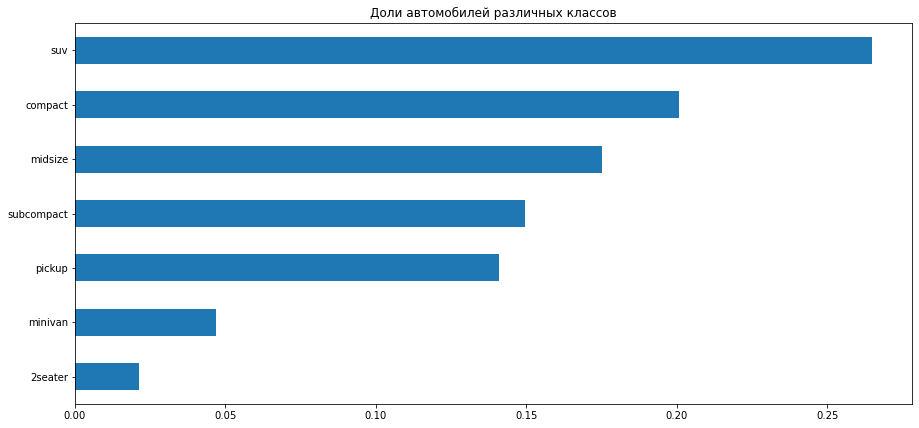

In [176]:
plt.figure(figsize=(15, 7))
mpg['class'].value_counts(ascending=True, normalize=True).plot(kind='barh')
plt.title('Доли автомобилей различных классов');

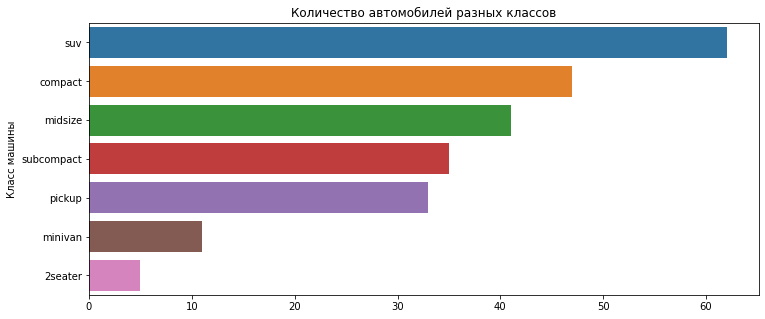

In [177]:
# В seaborn:
plt.figure(figsize=(12, 5))
sns.countplot(y = 'class', data=mpg, 
              order = mpg['class'].value_counts().index
             ).set(title='Количество автомобилей разных классов',
                  xlabel=None,
                  ylabel='Класс машины');

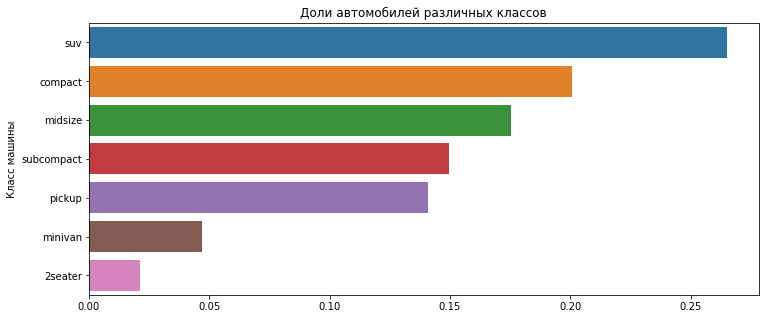

In [178]:
# Относительные частоты в seaborn:

class_freqs = mpg['class'].value_counts(normalize=True).reset_index() # Посчитали относительные частоты
plt.figure(figsize=(12, 5))
sns.barplot(x = 'class', y = 'index', data=class_freqs) # Нарисовали их
plt.title('Доли автомобилей различных классов')
plt.ylabel('Класс машины')
plt.xlabel(None);

**Интерпретация**

Наиболее частый класс машины в наборе данных - `suv`, наиболее редкий - `2seater`. Частота различных классов изменяется от 5 до 60, нет разницы в частотах на несколько порядков.


Столбиковые диаграммы можно использовать для визуализации любых описательных статистик для групп - средних, медиан и т.п.

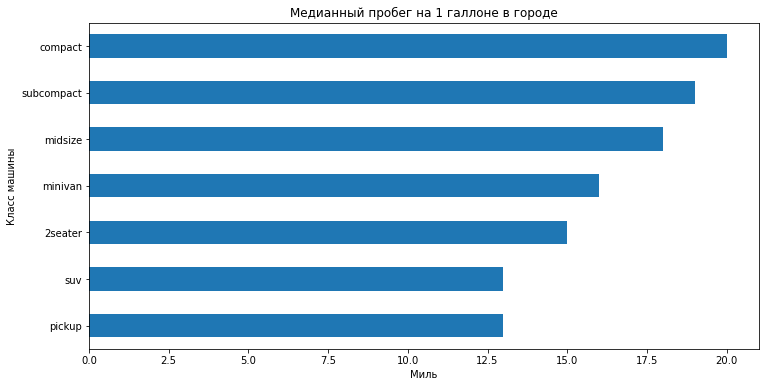

In [179]:
# В Pandas
plt.figure(figsize=(12, 6))

(mpg.groupby('class')['cty'].median()
 .sort_values()
 .plot(kind='barh'))

plt.title('Медианный пробег на 1 галлоне в городе')
plt.ylabel('Класс машины')
plt.xlabel('Миль');

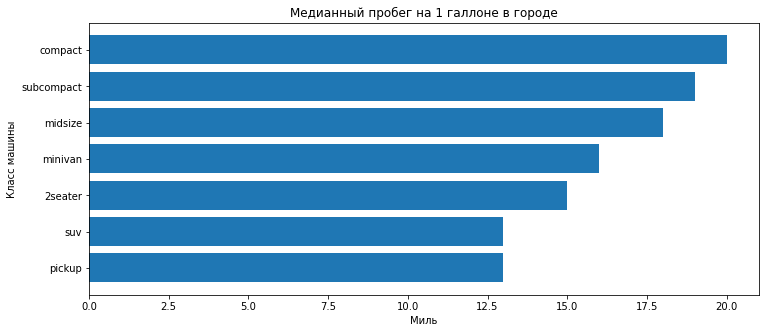

In [34]:
# В Matplotlib
med_cty_by_class = mpg.groupby('class')['cty'].median().sort_values()

plt.figure(figsize=(12, 5))
plt.barh(med_cty_by_class.index, med_cty_by_class)

plt.title('Медианный пробег на 1 галлоне в городе')
plt.ylabel('Класс машины')
plt.xlabel('Миль');

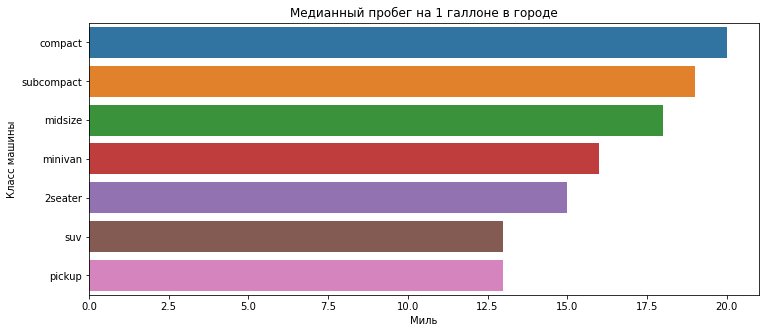

In [35]:
# В Seaborn:
plt.figure(figsize=(12, 5))

sns.barplot(y='class', x='cty', data=mpg,
           estimator=np.median, # Как агрегировать данные групп?
           ci=None, # убираем доверительный интервал, т.к. он будет для среднего, а не медианы
           order = mpg.groupby('class')['cty'].median().sort_values(ascending=False).index)


plt.title('Медианный пробег на 1 галлоне в городе')
plt.ylabel('Класс машины')
plt.xlabel('Миль');

**Интерпретация**

Медианный пробег машин класса `compact` - наибольший, а наименьшее его значение - у пикапов и `suv`.

Столбики со средними построить несколько проще, т.к. эта статистика вычисляется для групп по умолчанию.
Интересно, что рейтинг машин получился немного другим

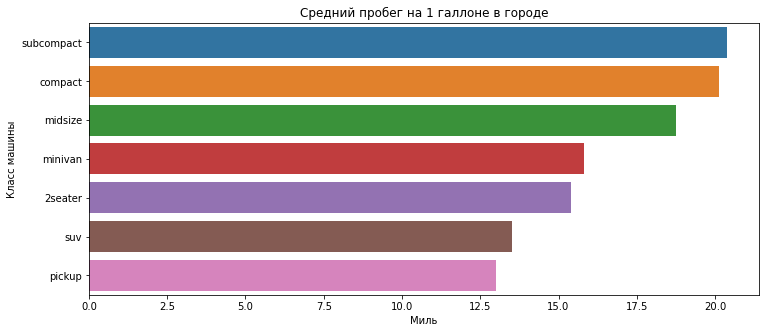

In [36]:
# В Seaborn:
plt.figure(figsize=(12, 5))

sns.barplot(y='class', x='cty', data=mpg,
           ci=None,
           order = mpg.groupby('class')['cty'].mean().sort_values(ascending=False).index)


plt.title('Средний пробег на 1 галлоне в городе')
plt.ylabel('Класс машины')
plt.xlabel('Миль');

Если категории упорядочены, то иногда для подчеркивания связи между ними используют не столбики, а линейные графики.

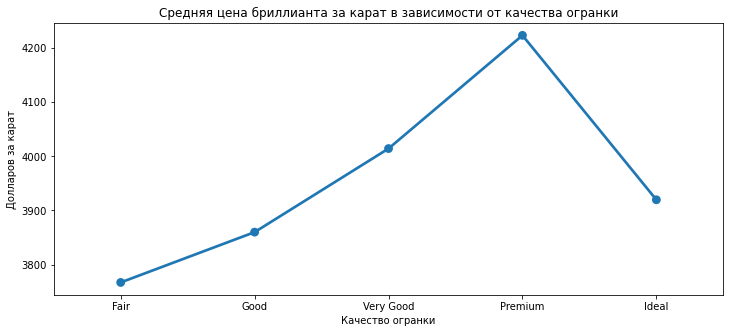

In [182]:
# В Seaborn
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'] # Порядок категорий

# Для сохранения порядка категорий сделаем категориальную переменную:
diamonds['cut_cat'] = pd.Categorical(diamonds['cut'],
                                     categories=cut_order, ordered=True)  # задаем порядок категорий


plt.figure(figsize=(12, 5))
sns.pointplot(x='cut_cat', y='price_per_carat', data=diamonds,
             ci = None,
             legend=False)

plt.title('Средняя цена бриллианта за карат в зависимости от качества огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Долларов за карат');


В pandas и matplotlib алгоритм действий следующий:
 1. Получить агрегированную таблицу с нужным порядком категорий
 2. Нарисовать

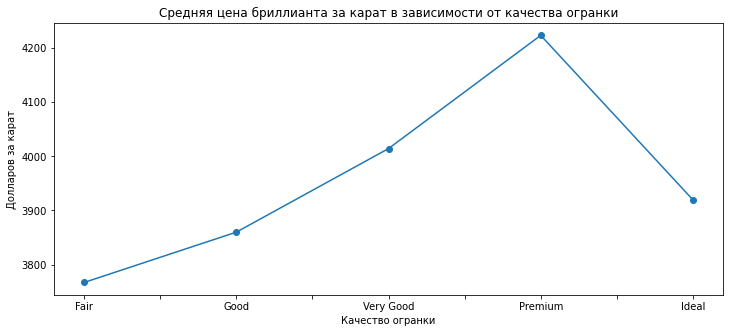

In [183]:
# Pandas:

# NB: в предыдущей ячейке мы сделали категориальную переменную cut_cat с заданным порядком категорий.
plt.figure(figsize=(12, 5))
diamonds.groupby('cut_cat')['price_per_carat'].mean().plot(kind='line', marker='o')

plt.title('Средняя цена бриллианта за карат в зависимости от качества огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Долларов за карат');

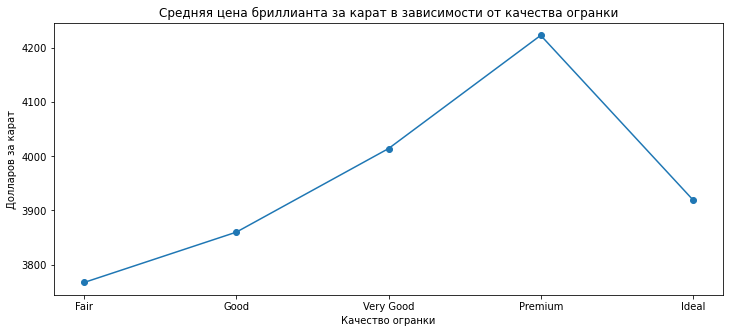

In [184]:
# Matplotlib:

# Готовим данные:
mean_ppc_per_cut = diamonds.groupby('cut_cat')['price_per_carat'].mean().reset_index()

# Рисуем:
plt.figure(figsize=(12, 5))

plt.plot('cut_cat', 'price_per_carat', data=mean_ppc_per_cut, marker='o')

plt.title('Средняя цена бриллианта за карат в зависимости от качества огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Долларов за карат');

**Интерпретация**

Цена бриллианта за карат возрастает по мере улучшения качества огранки. Странно, что бриллианты идеального качества огранки, в среднем, оказываются дешевле более низких категорий. Возможно, что существуют не учтенные нами факторы, влияющие на цену бриллианта с идеальной огранкой (например, их оттенок цвета).

### Две категориальные переменные


Исследование зависимостей между двумя категориальными переменными основано на анализе групповых частот.

#### Столбиковые диаграммы

Столбиковые диаграммы с расположенными рядом или состыкованными столбиками - классический инструмент визуализации зависимостей между категориальными переменными

In [185]:
# Pandas:
pd.crosstab(index=mpg['class'], columns=mpg['year'])

year,1999,2008
class,,
2seater,2,3
compact,25,22
midsize,20,21
minivan,6,5
pickup,16,17
subcompact,19,16
suv,29,33


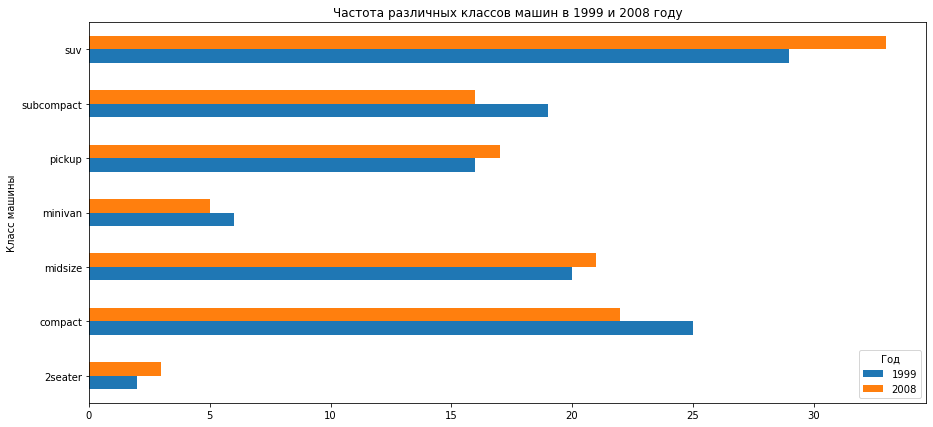

In [41]:
fig, ax = plt.subplots(1, figsize=(15, 7)) #plt.figure() не сработало

pd.crosstab(index=mpg['class'], columns=mpg['year']).plot(kind='barh', ax=ax)

plt.ylabel('Класс машины')
plt.legend(title='Год')
plt.title('Частота различных классов машин в 1999 и 2008 году');

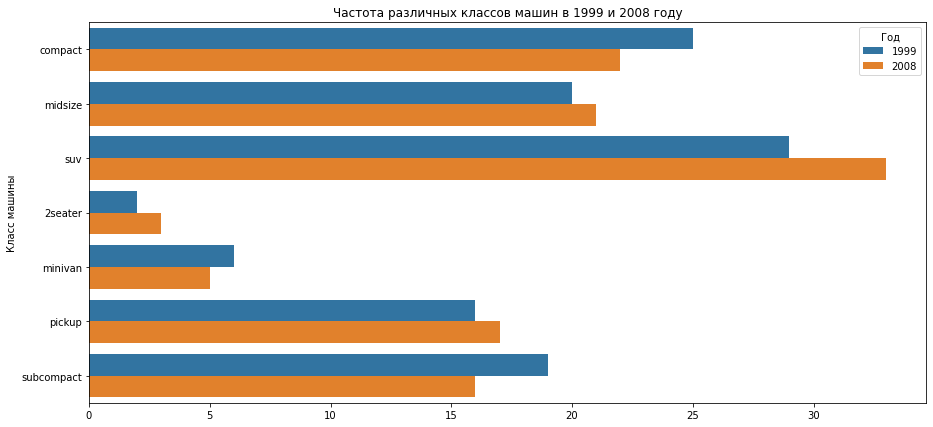

In [186]:
# В Seaborn:
plt.figure(figsize=(15, 7))

sns.countplot(y = 'class', hue='year', data=mpg)

plt.ylabel('Класс машины')
plt.xlabel(None)
plt.legend(title='Год')
plt.title('Частота различных классов машин в 1999 и 2008 году');

**Интерпретация**:

Сравнение частот классов в 1999 и 2008 году позволяет оценить, как менялась популярность каждого класса машин. Мы видим, что машин класса `compact` стало меньше, а машин класса `suv` больше.

Если групповые частоты сильно различаются, то некоторые столбики сливаются с нулем. В этом случае можно нормализовать групповые частоты. В нашем примере с автомобилями мы можем посчитать, какую долю от общего числа машин с заданным годом производства составляет каждый класс машин.

In [187]:
# Было:
pd.crosstab(index=mpg['class'], columns=mpg['year'])

year,1999,2008
class,,
2seater,2,3
compact,25,22
midsize,20,21
minivan,6,5
pickup,16,17
subcompact,19,16
suv,29,33


In [188]:
# Стало:
pd.crosstab(index=mpg['class'], columns=mpg['year'], normalize='columns') # Считаем доли по столбцу

year,1999,2008
class,,
2seater,0.017094,0.025641
compact,0.213675,0.188034
midsize,0.170940,0.179487
minivan,0.051282,0.042735
pickup,0.136752,0.145299
subcompact,0.162393,0.136752
suv,0.247863,0.282051


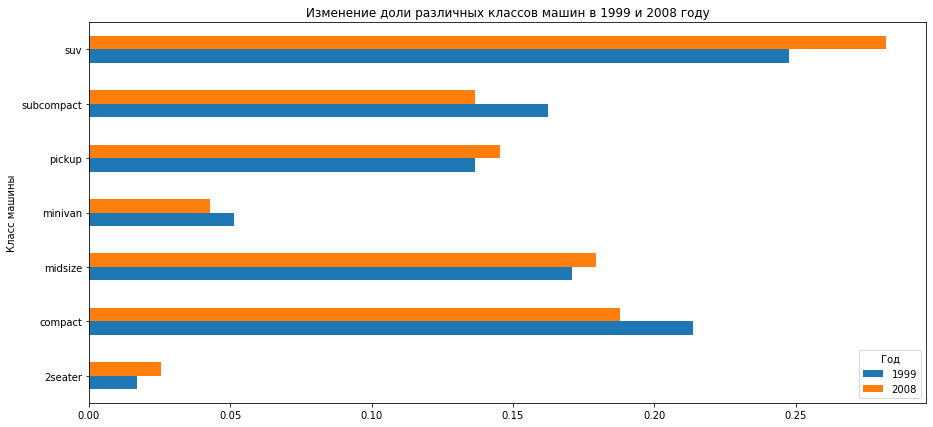

In [189]:

fig, ax = plt.subplots(1, figsize=(15, 7)) #plt.figure() не сработало

pd.crosstab(index=mpg['class'], columns=mpg['year'], normalize='columns').plot(kind='barh', ax=ax)

plt.ylabel('Класс машины')
plt.legend(title='Год')
plt.title('Изменение доли различных классов машин в 1999 и 2008 году');

В данном случае моделей 1999 и 2008 года было поровну, поэтому при переходе к относительным частотам вид графика не изменился.

Можно использовать также и состыкованные столбики. На этой диаграмме доля класса машин показана цветом:

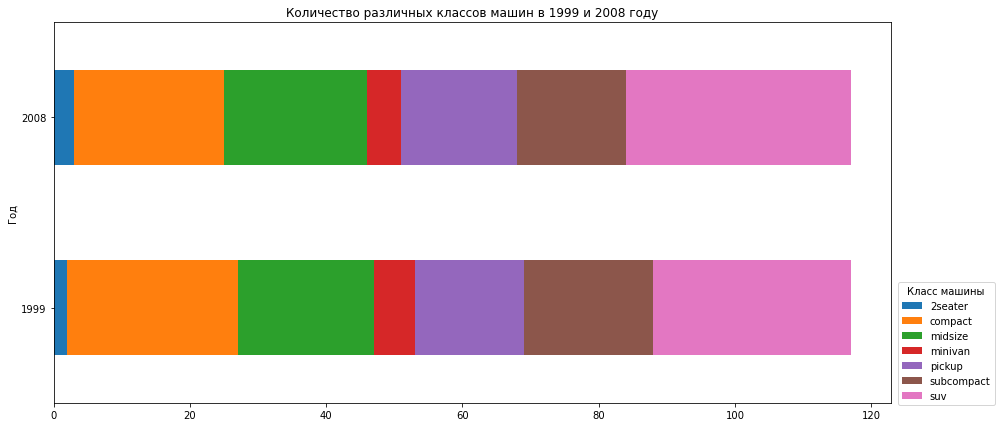

In [216]:
fig, ax = plt.subplots(1, figsize=(15, 7)) #plt.figure() не сработало

pd.crosstab(columns=mpg['class'], index=mpg['year']).plot(kind='barh', ax=ax, stacked=True)

plt.ylabel('Год')
plt.legend(title='Класс машины',
           bbox_to_anchor=(1.13, 0.33)) # подвинули легенду за пределы графика
plt.title('Количество различных классов машин в 1999 и 2008 году');

В случае неравенства частот категорий лучше использовать относительные частоты:

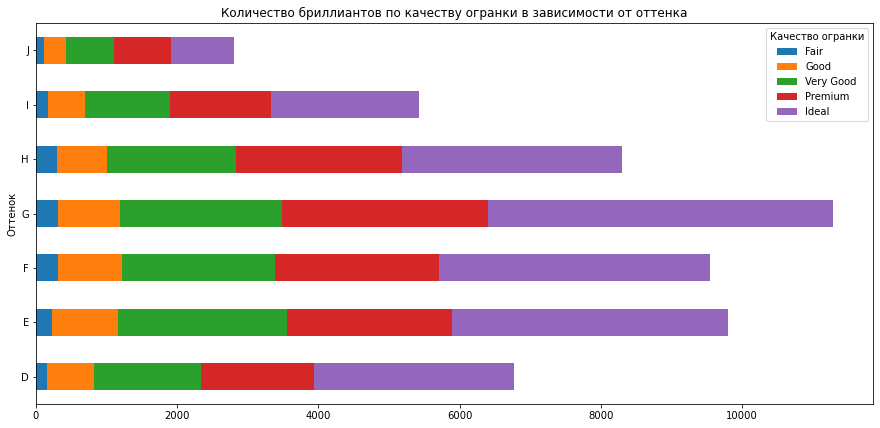

In [47]:
# Сложно оценить долю разных категорий огранки в зависимости от оттенка бриллианта
fig, ax = plt.subplots(1, figsize=(15, 7)) #plt.figure() не сработало

pd.crosstab(columns = diamonds['cut_cat'], 
            index=diamonds['color']).plot(kind='barh', stacked=True, ax=ax)


plt.ylabel('Оттенок')
plt.legend(title='Качество огранки', loc='best')
plt.title('Количество бриллиантов по качеству огранки в зависимости от оттенка');

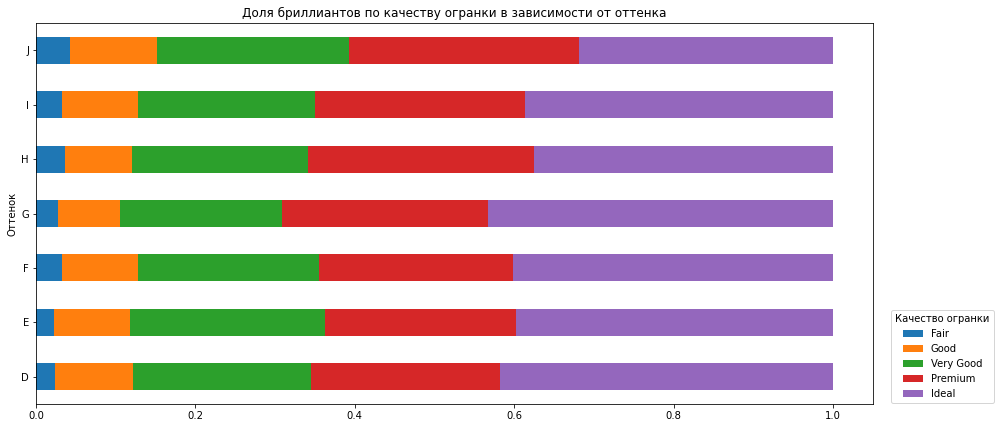

In [222]:
# После нормализации отличия в долях видны лучше

fig, ax = plt.subplots(1, figsize=(15, 7)) #plt.figure() не сработало

pd.crosstab(columns = diamonds['cut_cat'], 
            index=diamonds['color'], 
            normalize='index').plot(kind='barh', stacked=True, ax=ax)

plt.ylabel('Оттенок')
plt.legend(title='Качество огранки',
          bbox_to_anchor=(1.15, 0.26)) # подвинули легенду
plt.title('Доля бриллиантов по качеству огранки в зависимости от оттенка');

**Интерпретация**:

Категория цвета бриллианта `D` соответствует наивысшему классу - бесцветные камни. Чем дальше буква по алфавиту - тем желтее оттенок. Доля бриллиантов с премиальным и идеальным качеством огранки в этом классе выше, чем в классе `J` по цвету. Интересно, что зависимость немонотонная: в классе по цвету `G` доля бриллиантов с высшим качеством огранки самая большая. А на графике с абсолютными частотами мы видим, что таких камней больше всего.

#### Тепловые карты (heatmap)

Тепловые карты показывают групповые частоты с помощью цветовой шкалы. Про оформление тепловых карт можно посмотреть в [документации seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

In [49]:
# Готовим данные
diamonds_cut_color = pd.crosstab(columns = diamonds['cut_cat'], index=diamonds['color'])

diamonds_cut_color

cut_cat,Fair,Good,Very Good,Premium,Ideal
color,,,,,
D,163,662,1513,1603,2834
E,224,933,2400,2337,3903
F,312,909,2164,2331,3826
G,314,871,2299,2924,4884
H,303,702,1824,2360,3115
I,175,522,1204,1428,2093
J,119,307,678,808,896


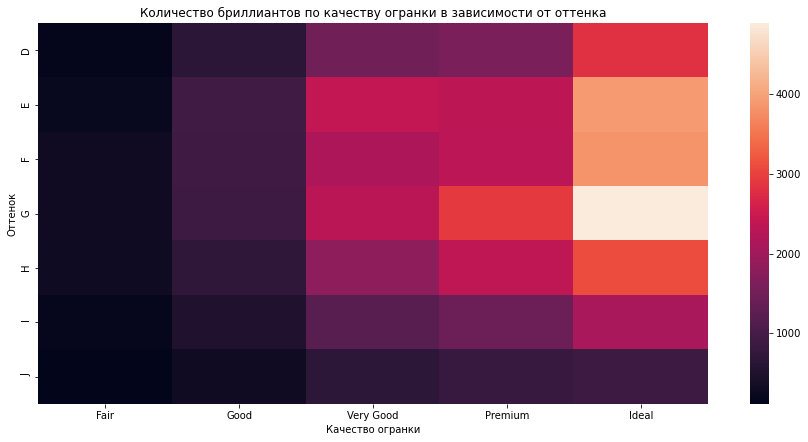

In [50]:
# Рисуем
plt.figure(figsize=(15, 7))
sns.heatmap(data=diamonds_cut_color);
plt.ylabel('Оттенок')
plt.xlabel('Качество огранки')
plt.title('Количество бриллиантов по качеству огранки в зависимости от оттенка');

**Интерпретация**

Больше всего в таблице бриллиантов с идеальной огранкой и оттенком класса `G`. Чем больше категория отличается от этого сочетания, тем меньше таких камней.

### Две количественные переменные

#### Диаграммы рассеяния (scatterplot)

Самым популярным способом визуализации зависимостей между двумя количественными переменными является диаграмма рассеяния (scatterplot). Каждая точка на ней - это наблюдения, а координаты точек - две исследуемые переменные. Если можно предположить, какая из них является причиной, а какая - следствием, то принято влияющую переменную отображать по оси x, а зависимую - по оси y.


Следующий график отражает, как пробег на 1 галлоне зависит от объема двигателя машины:

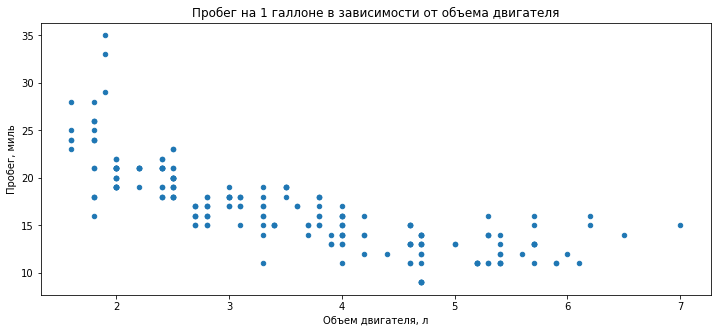

In [51]:
# Pandas
fig, ax = plt.subplots(1, figsize=(12, 5))
mpg.plot(x='displ', y='cty', kind='scatter', ax=ax);
plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');

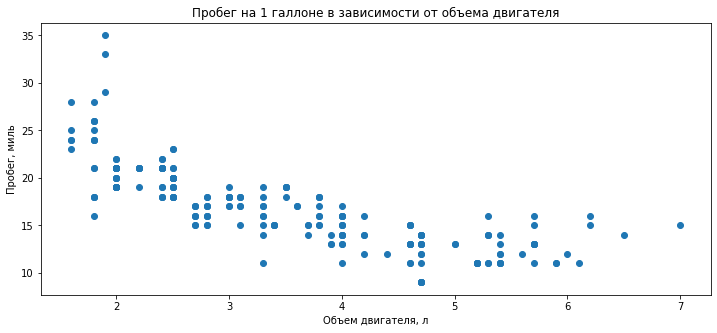

In [52]:
# Matplotlib:
plt.figure(figsize=(12, 5))
plt.scatter('displ', 'cty', data=mpg)
plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');

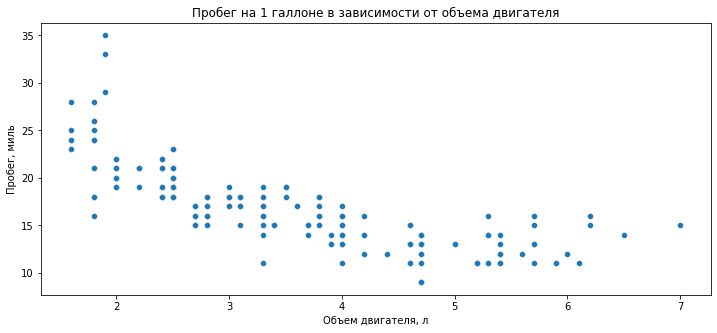

In [223]:
# Seaborn:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='displ', y='cty', data=mpg)

plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');


В Seaborn можно добавить на график линию тренда, чтобы подчеркнуть зависимость:

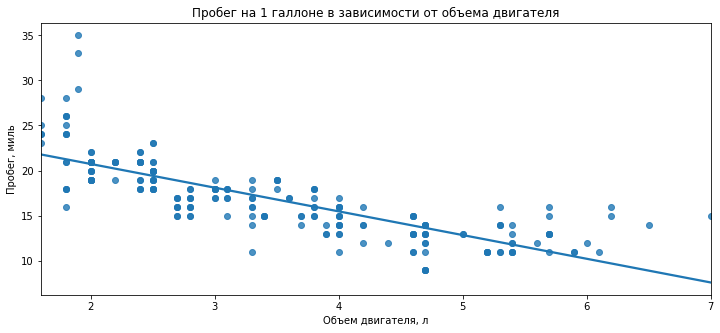

In [225]:
plt.figure(figsize=(12, 5))

sns.regplot(x='displ', y='cty', data=mpg, ci=None) # Линейный тренд

plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');


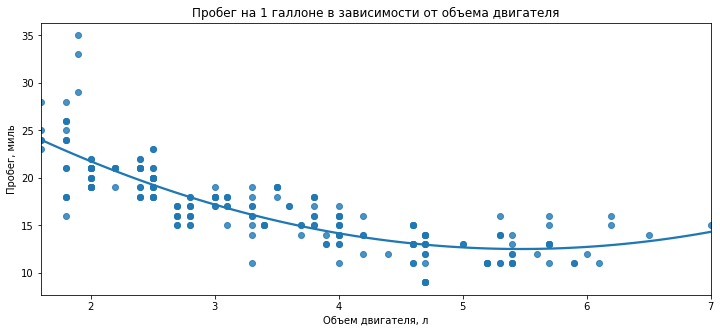

In [226]:
plt.figure(figsize=(12, 5))

sns.regplot(x='displ', y='cty', data=mpg, 
            order=2, # Квадратичный тренд
            ci=None) 

plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');


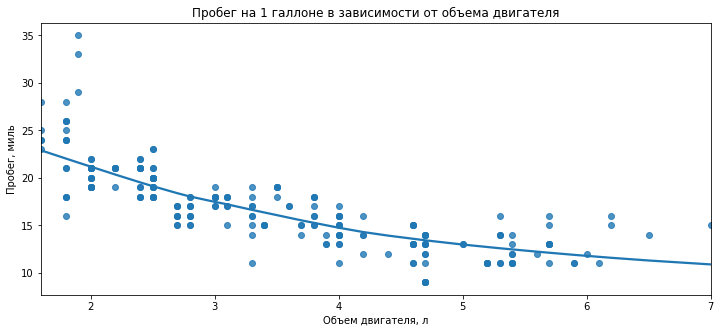

In [227]:
plt.figure(figsize=(12, 5))

sns.regplot(x='displ', y='cty', data=mpg, 
            lowess=True, # Непараметрическая оценка тренда методом LOWESS
            ci=None) 

plt.title('Пробег на 1 галлоне в зависимости от объема двигателя');
plt.xlabel('Объем двигателя, л')
plt.ylabel('Пробег, миль');


**Интерпретация**:

Между объемом двигателя и пробегом на галлоне - прослеживается зависимость. Чем больше двигатель - тем хуже топливная эффективность. Эта зависимость нелинейная. Вряд ли мы можем считать сам по себе объем двигателя причиной ухудшения топливной эффективности. Скорее, влияет другой фактор: большие двигатели ставят в большие и тяжелые машины.

#### Проблемы на диаграммах рассеяния

Когда данных много - точки на диаграмме рассеяния сливаются и сложно становится понять, где сконцентрированы данные:

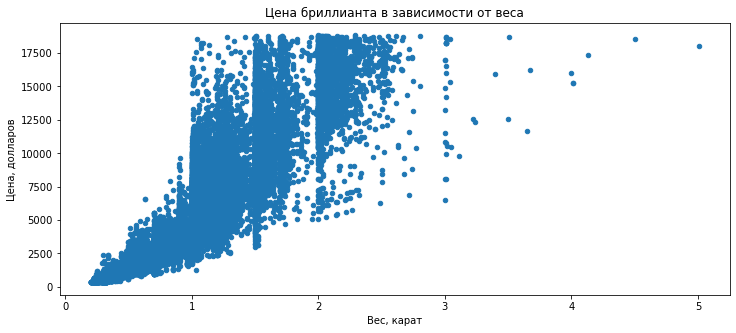

In [57]:
# Pandas:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax)

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

Одним из способов решения этой проблемы является использование прозрачности:

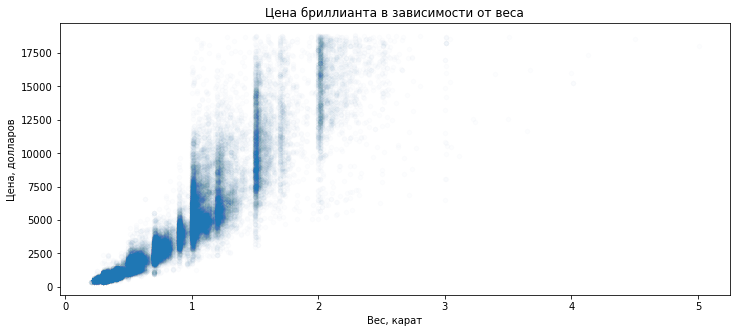

In [58]:
# Pandas:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax, alpha=0.01) # задаем прозрачность точек

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

Теперь на графике видны полосы из-за кратности веса 0.1 карату.

Еще один способ - использование тепловой карты, в которой плоскость разбивается на гексагоны, а затем подсчитывается частота точек в гексагонах:

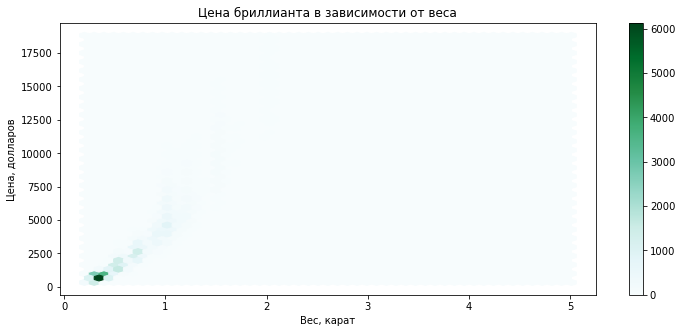

In [59]:
# Гексагональная тепловая карта в Pandas
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', 
              kind='hexbin', gridsize=50, # Количество ячеек по горизонтали
              ax=ax) # задаем прозрачность точек

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

В Seaborn можно построить похожий график, который оценивает плотность совместного распределения двух переменных.


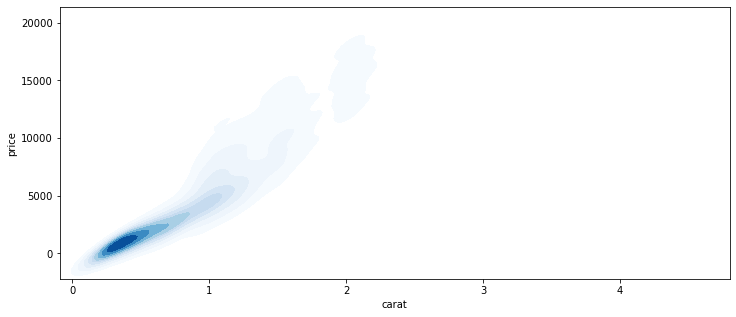

In [60]:
# Тепловая карта плотности распределения в Seaborn:

plt.figure(figsize=(12, 5))

sns.kdeplot(x='carat', y='price', data=diamonds.sample(frac=0.2), # Выбираем 20% строк, чтобы ускорить построение
            shade=True, cmap='Blues');

Еще одна проблема - скошенность распределений переменных, которые используются на графике.

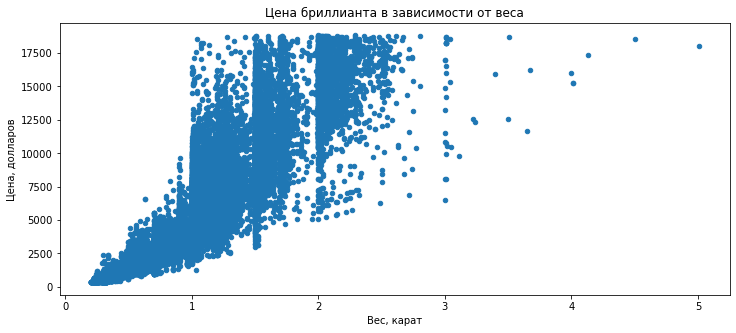

In [61]:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax)

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

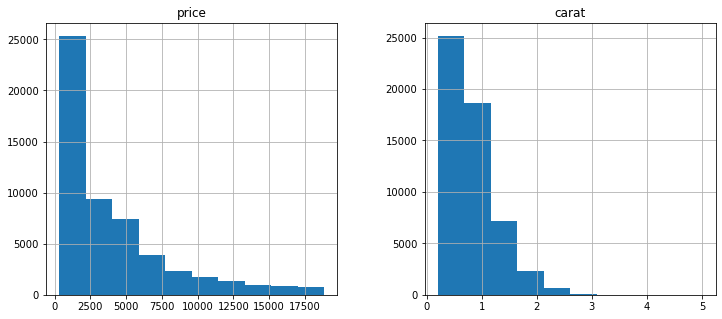

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
diamonds[['price', 'carat']].hist(ax=ax);

Из-за длинного хвоста распределения область графика растягивается и плохо видно, что происходит в центре. Бороться с этим помогает использование логарифмической шкалы на осях.

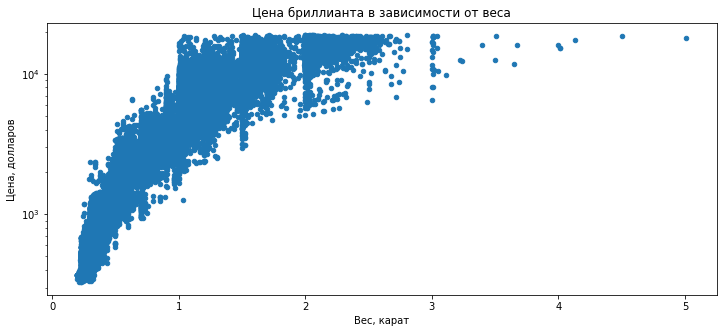

In [63]:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax,
             logy=True) # логарифмическая шкала по Y

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

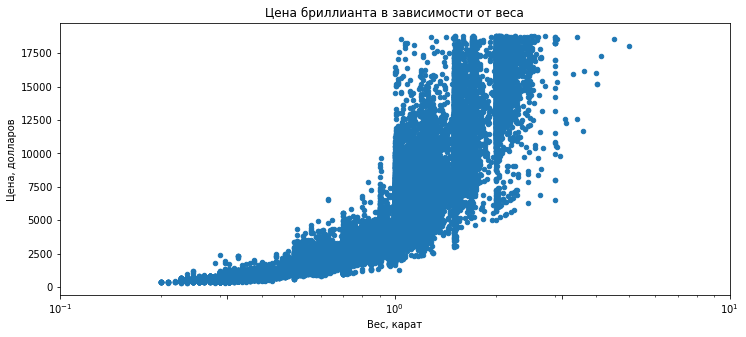

In [64]:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax,
             logx=True) # логарифмическая шкала по X

ax.set_xticks(np.logspace(-1, 1, 5)) # Подправили деления оси X
plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

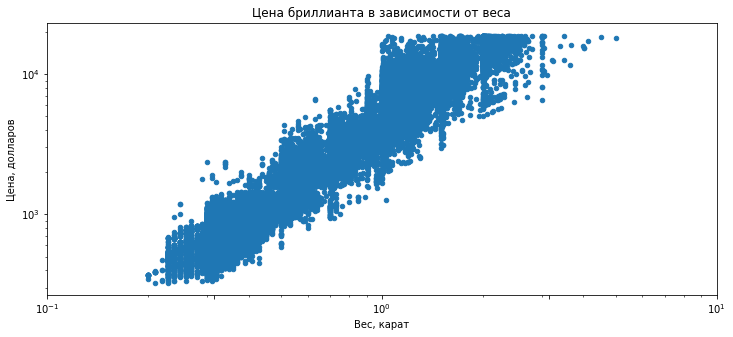

In [65]:
fig, ax = plt.subplots(1, figsize=(12, 5))

diamonds.plot(x='carat', y='price', kind='scatter', ax=ax,
             logx=True, logy=True) # логарифмическая шкала по X и Y

ax.set_xticks(np.logspace(-1, 1, 5)) # Подправили деления оси X

plt.title('Цена бриллианта в зависимости от веса');
plt.xlabel('Вес, карат')
plt.ylabel('Цена, долларов');

#### Матрица диаграмм рассеяния (Scatterplot Matrix)

Если необходимо быстро изучить зависимости между парами количественных переменных в таблице данных, то удобно использовать матрицу диаграмм рассеяния:

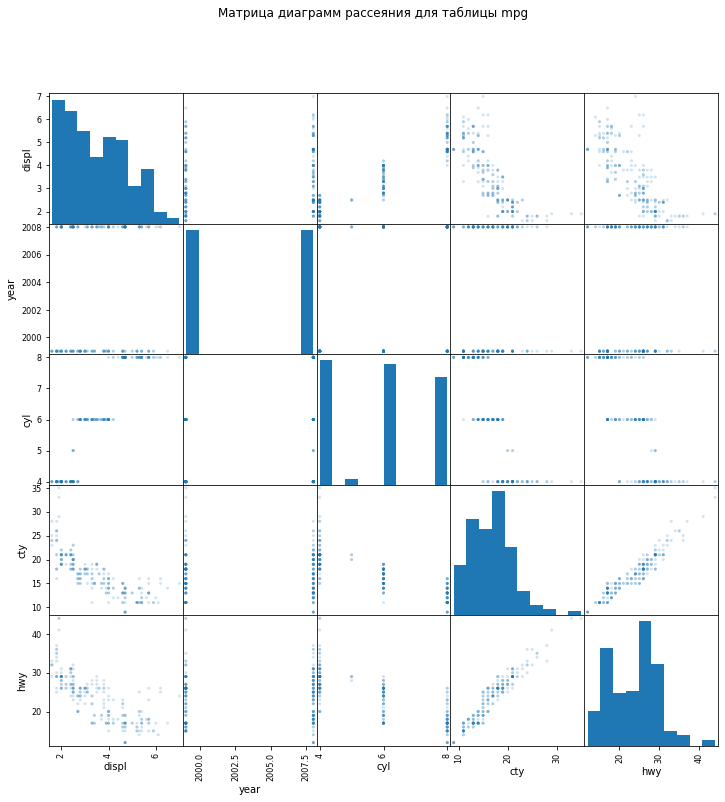

In [66]:
pd.plotting.scatter_matrix(mpg, alpha=0.2, figsize=(12, 12))
plt.suptitle('Матрица диаграмм рассеяния для таблицы mpg');

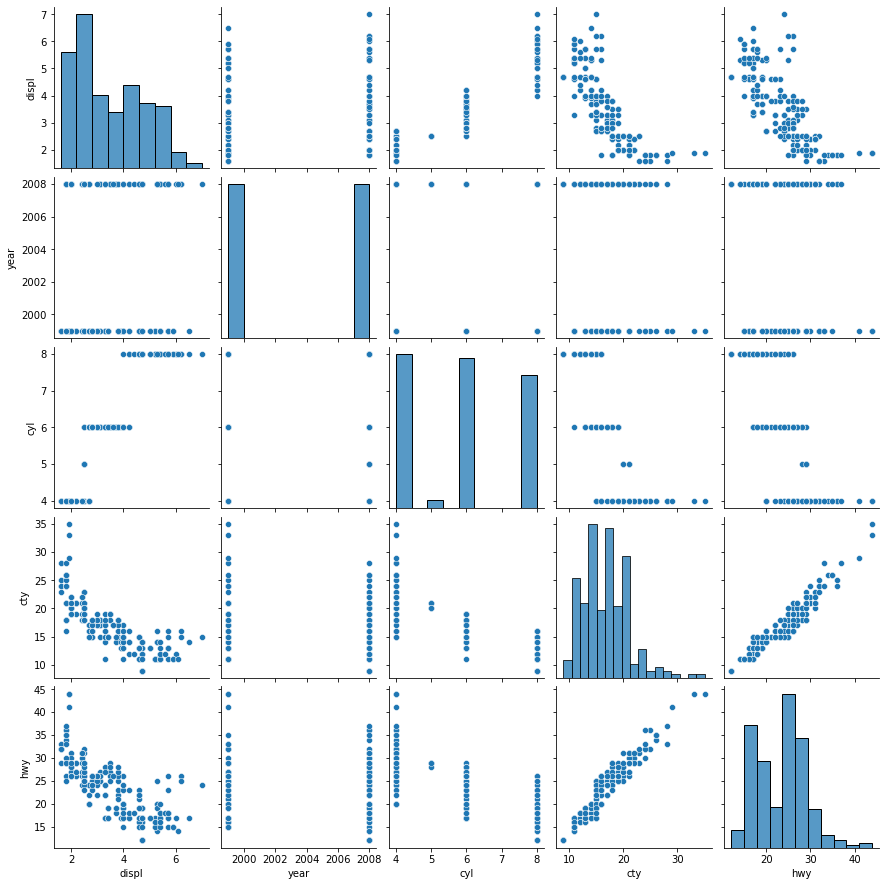

In [67]:
# В Seaborn:
sns.pairplot(mpg);

## Анализ зависимостей для нескольких переменных

При увеличении количества переменных, между которыми исследуются зависимости, число возможных способов визуализации быстро увеличивается. Здесь мы рассмотрим основные подходы.


### Визуализация как отображение (mapping)

В основе визуализации лежит связывание (отображение) столбцов таблицы данных с характеристиками графических элементов визуализации.

![](pics/gapminder.png)

[Открыть на Gapminder](https://www.gapminder.org/tools/#$locale$id=en;&state$time$value=2002&delay:902;;&chart-type=bubbles)


Наиболее выразительным способом отображения данных является положение графических элементов. Самые важные переменные следует связывать с положением.

![](pics/position_aesthetics.png)

Что делать если переменных больше? Хотя пространство трехмерно, использование третьей координатной оси в большинстве случаев усложняет восприятие данных.
![](pics/3D.png)


Единственным исключением являются различные научные и медицинские данные, которые можно представлять в 3-мерном пространстве, но при условии что с этими данными можно взаимодействовать, рассматривать их. В Python есть инструменты для 3D-визуализации, но мы их не будем рассматривать. Можно познакомиться с некоторыми примерами на [matplotlib](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) и [MayaVi](https://docs.enthought.com/mayavi/mayavi/auto/examples.html)


Что же тогда делать с дополнительными переменными? Их можно связывать с другими визуальными характеристиками - например, размером, цветом, углом наклона, текстурой, насыщенностью цвета. Еще можно делать по ним срезы/панели данных и можно использовать время для создания анимации.

![](pics/more_mappings.png)

Необходимо помнить, что некоторые визуальные характеристики человек различает лучше, чем другие. В экспериментах [Cleveland & McGill](https://web.cs.dal.ca/~sbrooks/csci4166-6406/seminars/readings/Cleveland_GraphicalPerception_Science85.pdf) и [Flowing Data](https://flowingdata.com/2010/03/20/graphical-perception-learn-the-fundamentals-first/) выяснился такой порядок по сложности восприятия: легче всего человек различает характеристики положения и длины, хуже всего - площадь, объем, оттенки и насыщенность цвета.
![](pics/mappings_preference.png)

Рекомендуем вам пользоваться специальными ресурсами, посвященными выбору подходящего способа визуализации:

* https://www.data-to-viz.com/  
* https://datavizproject.com/  
* https://datavizcatalogue.com/RU/
* https://datayoga.ru/vizcards#catalogue

Концепция связывания переменных реализована в пакете Seaborn. Функция `relplot()` используется для исследования зависимостей между двумя количественными переменными в подгруппах. 

Здесь мы сравниваем зависимость пробега от объема двигателя для машин двух разных годов выпуска. Переменная `year` связана со столбцами (`col`) визуализации. В документации есть [примеры](https://seaborn.pydata.org/examples/scatter_bubbles.html) использования других графических характеристик для связывания с переменными.

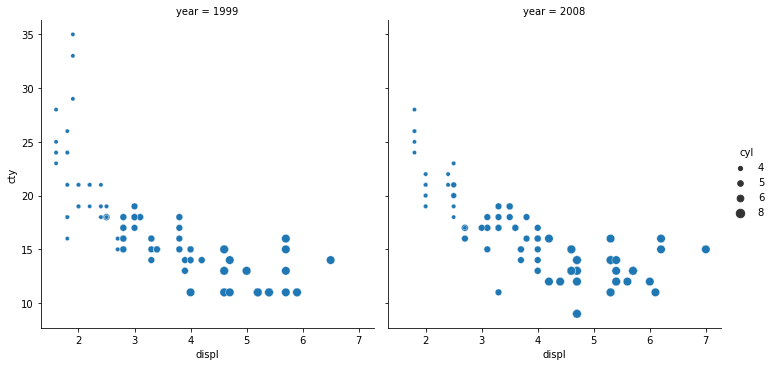

In [68]:
# Seaborn: Связываем категорию со столбцами
sns.relplot(x='displ', y='cty', kind='scatter', data=mpg, col='year', size='cyl');
plt.show()

# В seaborn < 0.11 есть проблема со связыванием цвета и размера

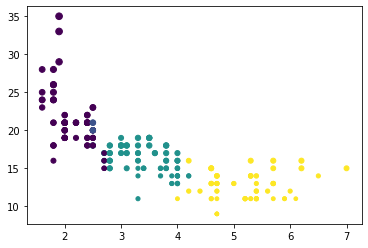

In [69]:
# в Matplotlib:
plt.scatter(x='displ', y='cty', c='cyl', s='hwy', data=mpg);
# Есть проблема со связыванием категориальных переменных, масштабирование размера приходится делать самостоятельно